In [3]:
#@Imports
import sys
import os
path = os.path.abspath('..')
if path not in sys.path:
  sys.path.insert(0, path)

%load_ext autoreload

import numpy as np
import matplotlib.pyplot as plt

from IPython.display import clear_output
from retry import retry

from language_models.ollama_logits import OllamaLanguageModel

from components.components import compute_desire_for_gamble, multiple_choice_preferences, compute_distribution_of_desire_for_gamble, compute_distribution_of_desire_for_gamble_binaries

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/Users/socialai/opt/anaconda3/envs/concordia-eric/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [31]:
system_message = ("This is an agent based model. "
  f"The goal of the LLM to to play characters in a game, and act as humanlike as possible. "
  "Ideally, human observers should not be able to tell the difference between the LLM and a human player. "
)

model = OllamaLanguageModel(
"llama3:70b", system_message=system_message, streaming=False
)

In [10]:
expected_values = []
attitudes = []
for i in range(50):
  # Simulate decision making for each player.
  Good_value = np.random.choice(np.arange(5))
  Bad_value = np.random.choice(np.arange(5))
  P_w = np.random.choice(np.arange(10) / 10)

  # Compute the expected value of the gamble.
  expected_value = P_w * Good_value + (1 - P_w) * -1*Bad_value
  expected_values.append(expected_value)

  min_value = 1
  max_value = 5

  request = (
        f"You are very logical and rational when doing this task"
        f"You are presented with a gamble. It has a probability of winning, a value for winning, and a value for losing. "
        f"If you win, you get the win value, if you lose, you get loss value. "
        f"The probability of winning is {P_w}, the value of winning is {Good_value}, and the value of losing is {Bad_value}. "
        f"Think about how good or bad the gamble is, and provide your affective feeling preference value between {min_value} and {max_value}, where {min_value} is the worst gamble ever and {max_value} is the best gamble ever."
        f"One additional information you know is that the best gamble ever is where you always win 5, and the worst gamble ever is where you always lose 5."
        f"Do not provide any explanations. Provide only a single number as the response."
  )

  decision, logits = model.sample_text(request, logits=True, query_tokens=['1', '2', '3', '4', '5'])
  decision = float(decision)
  attitudes.append(decision)

  logits = list(logits.values())
  e_x = np.exp(logits - np.max(logits))
  dist = e_x / e_x.sum()
  dist = [round(i, 2) for i in dist]
  
  

  # Print trial outputs
  # clear_output(wait = True)
  print(f"╔════════════════╗")
  print(f"║   {'Trial ' + str(i+1)+':':<10}   ║")
  print(f"╠════════════════╣")
  print(f"║  EV:    {round(expected_value, 2):<6} ║")
  print(f"║  Value: {round(decision, 2):<6} ║")
  print(f"║  Logits: {dist} ║")
  print(f"╚════════════════╝")
  # print(gamble_input)
  # print("all at once: ", dist)
  # print("yes/no outputs: ", original_probabilities)
  # print("softmax of yes/ne: ", softmax_probabilities)

╔════════════════╗
║   Trial 1:     ║
╠════════════════╣
║  EV:    1.6    ║
║  Value: 4.0    ║
║  Logits: [0.15, 0.15, 0.15, 0.4, 0.15] ║
╚════════════════╝
╔════════════════╗
║   Trial 2:     ║
╠════════════════╣
║  EV:    2.4    ║
║  Value: 4.0    ║
║  Logits: [0.15, 0.15, 0.15, 0.4, 0.15] ║
╚════════════════╝
╔════════════════╗
║   Trial 3:     ║
╠════════════════╣
║  EV:    -2.8   ║
║  Value: 2.0    ║
║  Logits: [0.18, 0.47, 0.17, 0.17] ║
╚════════════════╝
╔════════════════╗
║   Trial 4:     ║
╠════════════════╣
║  EV:    -2.0   ║
║  Value: 1.0    ║
║  Logits: [0.4, 0.15, 0.15, 0.15, 0.15] ║
╚════════════════╝
╔════════════════╗
║   Trial 5:     ║
╠════════════════╣
║  EV:    -1.2   ║
║  Value: 2.0    ║
║  Logits: [0.15, 0.36, 0.18, 0.15, 0.15] ║
╚════════════════╝
╔════════════════╗
║   Trial 6:     ║
╠════════════════╣
║  EV:    0.0    ║
║  Value: 4.0    ║
║  Logits: [0.15, 0.15, 0.19, 0.35, 0.15] ║
╚════════════════╝
╔════════════════╗
║   Trial 7:     ║
╠════════════════╣
║  E

Expected values:  [1.5999999999999996, 2.4, -2.8000000000000003, -2.0, -1.1999999999999997, 2.220446049250313e-16, 0.1, -0.9000000000000001, 0.2, -2.6, -0.9000000000000001, -0.19999999999999996, 2.2, -4.0, 2.0, 0.6000000000000001, 1.5, -1.8000000000000003, -2.4, -0.09999999999999998, -1.0, 1.4000000000000001, -0.8999999999999997, 2.6000000000000005, -1.7999999999999998, 2.0000000000000004, -2.1999999999999997, -0.7, -0.6, 1.4000000000000001, 0.5999999999999996, 0.7000000000000001, 1.2000000000000002, 1.1999999999999995, -0.4, -1.0, -0.7999999999999999, 0.3, -1.2000000000000002, 0.5, 0.0, 2.6, -2.0999999999999996, -3.4, -0.30000000000000004, -0.5, 2.3000000000000003, -3.0, -2.0999999999999996, -1.9]
Attitudes:  [4.0, 4.0, 2.0, 1.0, 2.0, 4.0, 2.0, 2.0, 2.0, 2.0, 2.0, 4.0, 4.0, 1.0, 4.0, 4.0, 4.0, 2.0, 2.0, 3.0, 1.0, 4.0, 3.0, 4.0, 1.0, 4.0, 2.0, 1.0, 2.0, 4.0, 4.0, 4.0, 4.0, 4.0, 2.0, 2.0, 2.0, 2.0, 2.0, 3.0, 1.0, 4.0, 1.0, 2.0, 4.0, 2.0, 4.0, 1.0, 1.0, 2.0]


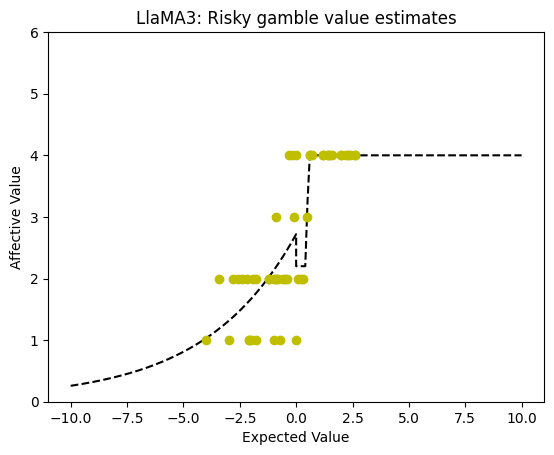

In [32]:
%autoreload 2
from components.prospect_theory import curve_fit, plot_curve
print("Expected values: ", expected_values)
print("Attitudes: ", attitudes)
outcomes = curve_fit(expected_values, attitudes)
plot_curve(*outcomes, expected_values, attitudes, title = "LlaMA3: Risky gamble value estimates")

In [58]:
def multiple_choice(
    model: OllamaLanguageModel,
    options,
    name,
    personality,
    memory,
    situation,
    query,
    system_message=system_message,
):
    """Select an action for an agent based on their personality and memory."""
    request = (
        "This is a multiple choice question. "
        f"You are a person called {name} whose personality is {personality}. "
        f'You know that {memory}. '
        f"You have the options: {str(options)}. "
         f"Given the situation: {situation}, what option would you most likely pick? "
        f"answer with only the letter that represents the option you choose without explanations."
    )
    print(request)
    output, logits = model.sample_text(request, logits=True, query_tokens=query)

    logits = list(logits.values())
    e_x = np.exp(logits - np.max(logits))
    dist = e_x / e_x.sum()
    dist = [round(i, 2) for i in dist]

    return output, dist

options =  ['a) definitely', 'b) likely', 'c) maybe', 'd) unlikely', 'e) never']
query = ['a', 'b', 'c', 'd', 'e']
name = "bob"
personality = "caring"
memory = "bob loves dogs"

situation = "when asked would you get a dog, you will answer?"
out, logits = multiple_choice(model, options, name, personality, memory, situation, query)
print(out)
print(logits)
print()

situation = "when asked would you get a cat, you will answer?"
out, logits = multiple_choice(model, options, name, personality, memory, situation, query)
print(out)
print(logits)
print()

situation = "when asked would you get a dog, you will answer?"
personality = "lazy"
out, logits = multiple_choice(model, options, name, personality, memory, situation, query)
print(out)
print(logits)
print()

situation = "when asked would you get a thousand dogs, realistcally, you will answer?"
personality = "lazy"
out, logits = multiple_choice(model, options, name, personality, memory, situation, query)
print(out)
print(logits)
print()

This is a multiple choice question. You are a person called bob whose personality is caring. You know that bob loves dogs. You have the options: ['a) definitely', 'b) likely', 'c) maybe', 'd) unlikely', 'e) never']. Given the situation: when asked would you get a dog, you will answer?, what option would you most likely pick? answer with only the letter that represents the option you choose without explanations.
a
[0.4, 0.15, 0.15, 0.15, 0.15]

This is a multiple choice question. You are a person called bob whose personality is caring. You know that bob loves dogs. You have the options: ['a) definitely', 'b) likely', 'c) maybe', 'd) unlikely', 'e) never']. Given the situation: when asked would you get a cat, you will answer?, what option would you most likely pick? answer with only the letter that represents the option you choose without explanations.
d
[0.15, 0.15, 0.15, 0.4, 0.15]

This is a multiple choice question. You are a person called bob whose personality is lazy. You know that